In [1]:
import numpy as np
import netCDF4 as nc
import f90nml
import os
import matplotlib.pyplot as plt
from salishsea_tools import bio_tools as bio
import visualisations
from matplotlib.colors import LinearSegmentedColormap
%matplotlib inline

In [2]:
bathy = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')
mesh = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/mesh_mask201702.nc')

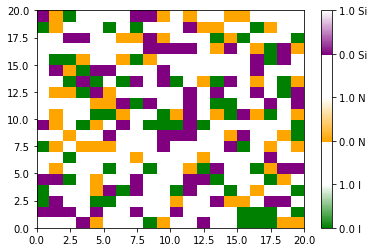

In [3]:
vmax = 5.0
cmap = LinearSegmentedColormap.from_list('mycmap', [(0 / vmax, 'green'),
                                                    (1 / vmax, 'white'),
                                                    (1.99 / vmax, 'white'),
                                                    (2 / vmax, 'orange'),
                                                    (3 / vmax, 'white'),
                                                    (3.99 / vmax, 'white'),
                                                    (4 / vmax, 'purple'),
                                                    (5 / vmax, 'white')]
                                        )

mesh1 = plt.pcolormesh(np.random.randint(0,6, size=(20,20)), cmap = cmap)
ticks = [0,1,2,3,4,5]
cbar1 = plt.colorbar(mesh1)
cbar1.set_ticks([0,1,2,3,4,5])
cbar1.set_ticklabels(['0.0 I', '1.0 I', '0.0 N', '1.0 N', '0.0 Si', '1.0 Si'])

In [22]:
def limit_along_thalweg(path, diafile, ptrcfile, phytoplankton):
    resDir=path
    nampisprod=bio.load_nml_bio(resDir,'nampisprod',
                            namRefDir='/data/vdo/MEOPAR/NEMO-3.6-code/NEMOGCM/CONFIG/SMELT/EXP00/')
    fdia=nc.Dataset(os.path.join(resDir,diafile))
    fptc=nc.Dataset(os.path.join(resDir,ptrcfile))
    with nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702.nc') as m:
        tmask=m.variables['tmask'][:,:,:,:]
    I=fdia.variables['PAR'][9,:,:,:]
    NO=fptc.variables['nitrate'][19,:,:,:]
    NH=fptc.variables['ammonium'][19,:,:,:]
    Si=fptc.variables['silicon'][19,:,:,:]
    D,M,N = bio.calc_p_limiters(I,NO,NH,Si,tmask[0,:,:,:],nampisprod)
    fig, ax = plt.subplots(2,1,figsize = (14,6))
    if phytoplankton == 'dia':
        visualisations.contour_thalweg(ax[0], D['limiter'], bathy, mesh, 
                               np.arange(-2, 4.5, 2), cmap = 'jet')
        cbar = visualisations.contour_thalweg(ax[1], D['limval'], bathy, mesh,
                                  np.arange(0,5.1,0.25), cmap = cmap)
        ax[0].set_title('Limiting Variable for Diatoms')
        ax[1].set_title('Rate Limitation Factor for Diatoms')
    elif phytoplankton == 'meso':
        visualisations.contour_thalweg(ax[0], M['limiter'], bathy, mesh,
                              np.arange(-2,4.5,2), cmap = 'jet')
        cbar = visualisations.contour_thalweg(ax[1], M['limval'], bathy, mesh,
                                  np.arange(0,5.1,0.25), cmap = cmap)
        ax[0].set_title('Limiting Variable for Mesodiniums')
        ax[1].set_title('Rate Limitation Factor for Mesodiniums')
    elif phytoplankton == 'flag':
        visualisations.contour_thalweg(ax[0], N['limiter'], bathy, mesh,
                              np.arange(-2,4.5,2), cmap = 'jet')
        cbar = visualisations.contour_thalweg(ax[1], N['limval'], bathy, mesh,
                                  np.arange(0,5.1,0.25), cmap = cmap)
        ax[0].set_title('Limiting Variable for Flagellates')
        ax[1].set_title('Rate Limitation Factor for Flagellates')
    cbar.set_ticks([0,1,2,3,4,5])
    cbar.set_ticklabels(['0.0 I','1.0 I','0.0 N','1.0 N','0.0 Si','1.0 Si'])
    for ax in ax:
        ax.set_ylim(35,0)
    plt.tight_layout()
    return cbar

# January 2016

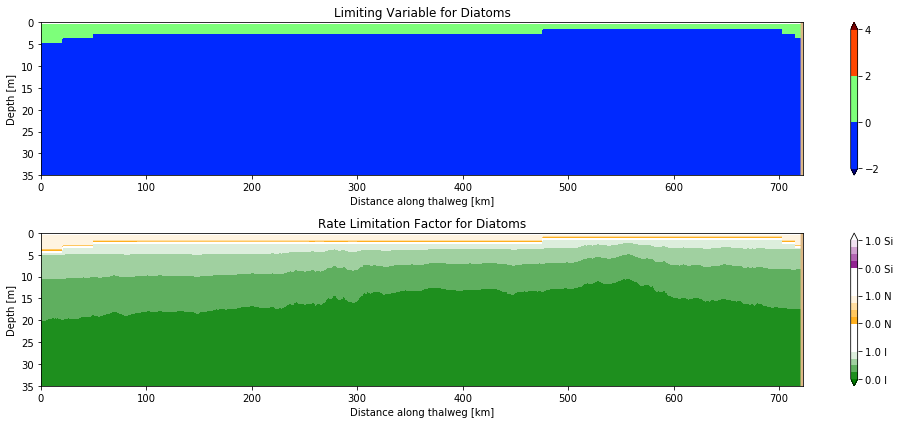

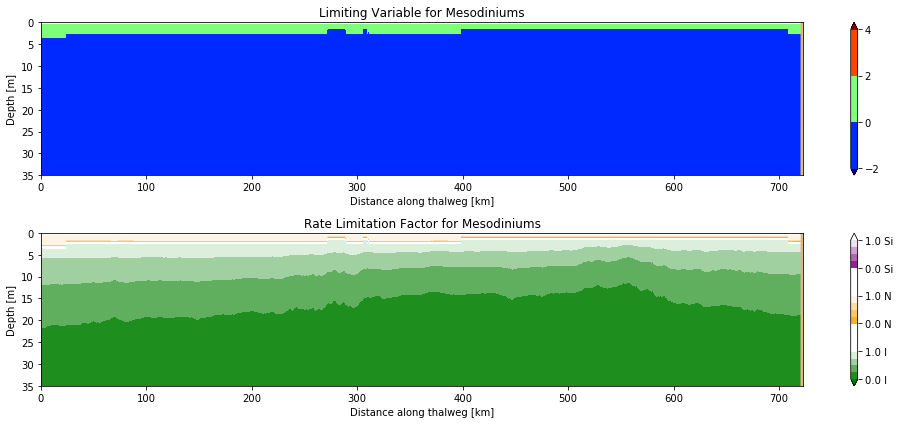

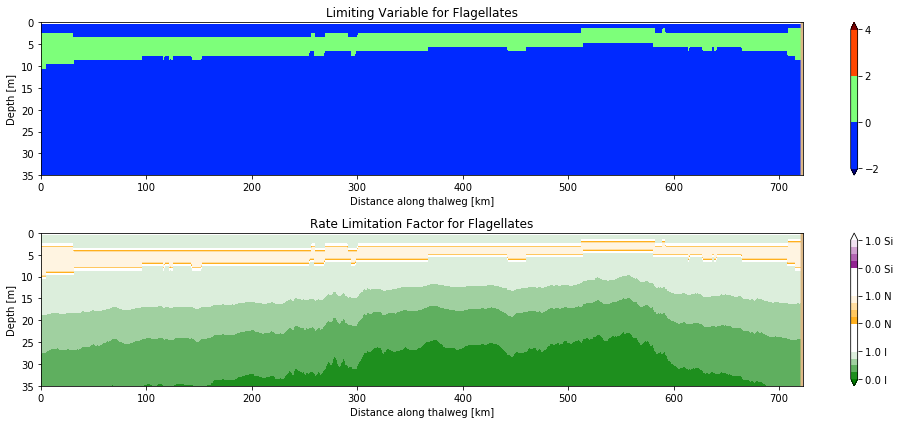

In [23]:
limit_along_thalweg('/results/SalishSea/nowcast-green/02jan16', 
                    'SalishSea_2h_20160102_20160111_dia1_T.nc',
                   'SalishSea_1h_20160102_20160102_ptrc_T.nc', 'dia')
limit_along_thalweg('/results/SalishSea/nowcast-green/02jan16', 
                    'SalishSea_2h_20160102_20160111_dia1_T.nc',
                   'SalishSea_1h_20160102_20160102_ptrc_T.nc', 'meso')
limit_along_thalweg('/results/SalishSea/nowcast-green/02jan16', 
                    'SalishSea_2h_20160102_20160111_dia1_T.nc',
                   'SalishSea_1h_20160102_20160102_ptrc_T.nc', 'flag')

# Febuary 2016

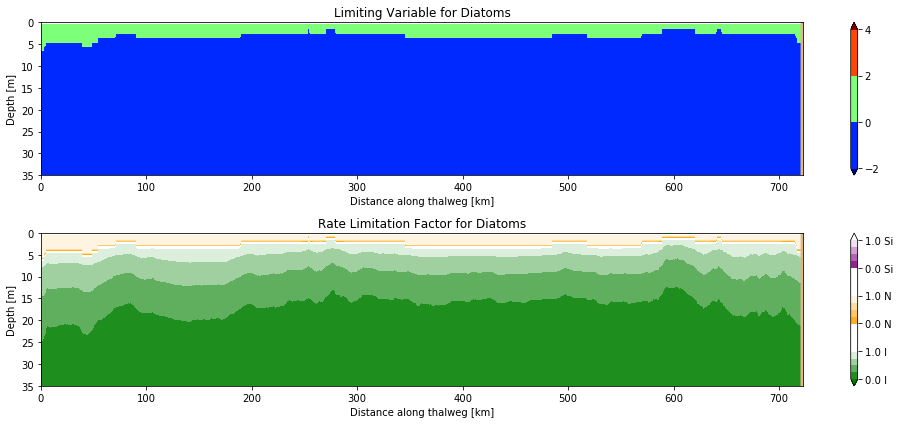

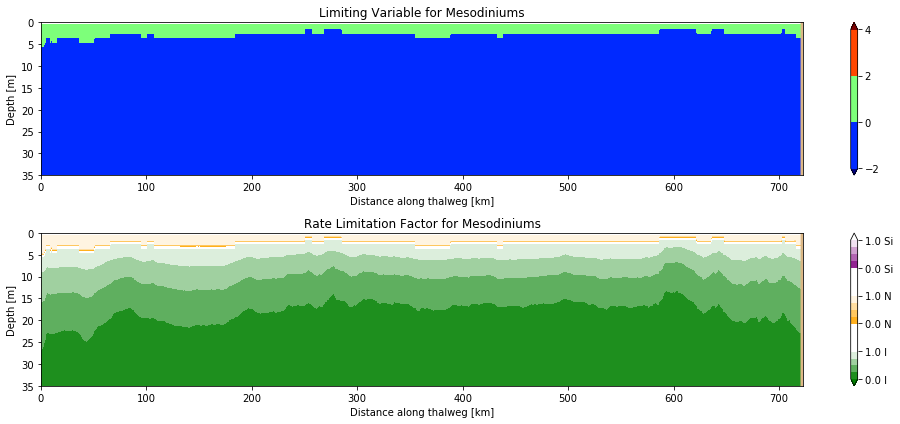

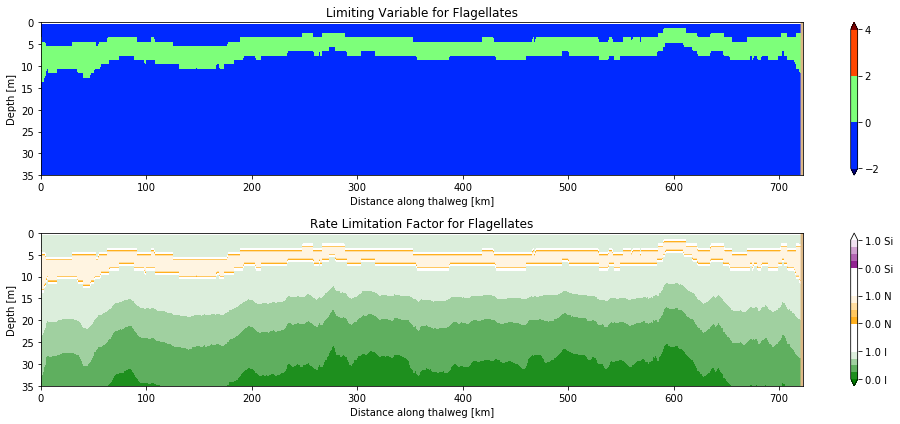

In [24]:
limit_along_thalweg('/results/SalishSea/nowcast-green/01feb16', 
                    'SalishSea_2h_20160201_20160210_dia1_T.nc',
                   'SalishSea_1h_20160201_20160201_ptrc_T.nc', 'dia')
limit_along_thalweg('/results/SalishSea/nowcast-green/01feb16', 
                    'SalishSea_2h_20160201_20160210_dia1_T.nc',
                   'SalishSea_1h_20160201_20160201_ptrc_T.nc', 'meso')
limit_along_thalweg('/results/SalishSea/nowcast-green/01feb16', 
                    'SalishSea_2h_20160201_20160210_dia1_T.nc',
                   'SalishSea_1h_20160201_20160201_ptrc_T.nc', 'flag')

# March 2016

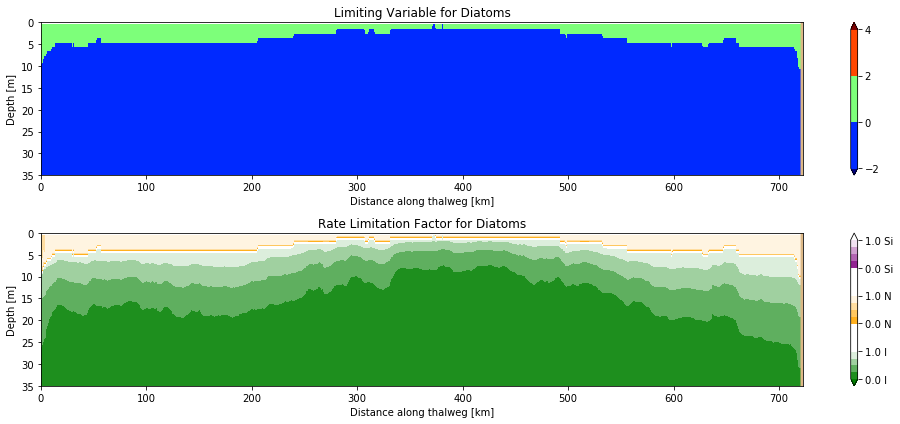

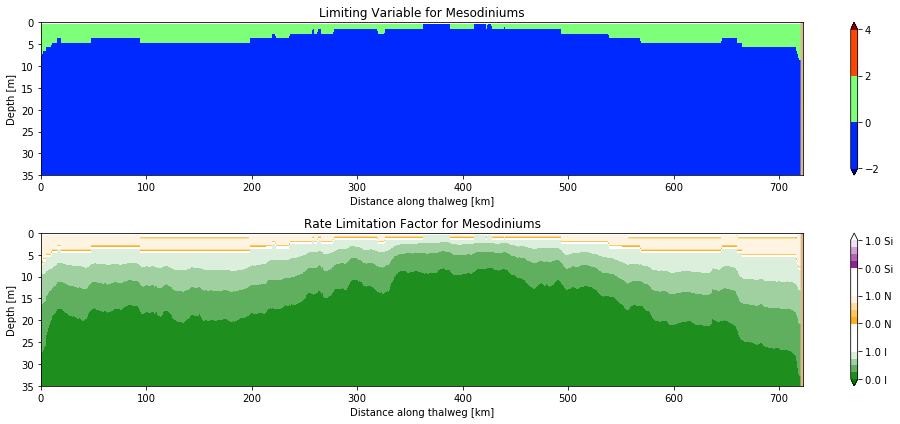

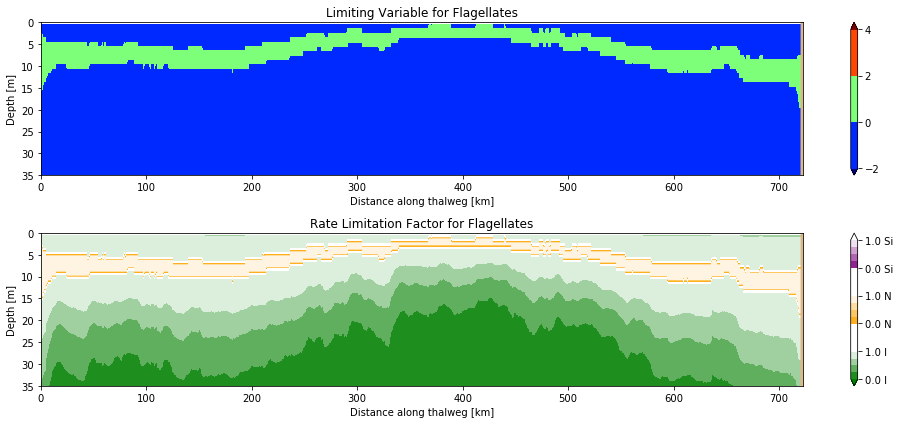

In [25]:
limit_along_thalweg('/results/SalishSea/nowcast-green/02mar16',
                   'SalishSea_2h_20160302_20160311_dia1_T.nc',
                   'SalishSea_1h_20160302_20160302_ptrc_T.nc', 'dia')
limit_along_thalweg('/results/SalishSea/nowcast-green/02mar16',
                   'SalishSea_2h_20160302_20160311_dia1_T.nc',
                   'SalishSea_1h_20160302_20160302_ptrc_T.nc', 'meso')
limit_along_thalweg('/results/SalishSea/nowcast-green/02mar16',
                   'SalishSea_2h_20160302_20160311_dia1_T.nc',
                   'SalishSea_1h_20160302_20160302_ptrc_T.nc', 'flag')

# April 2016

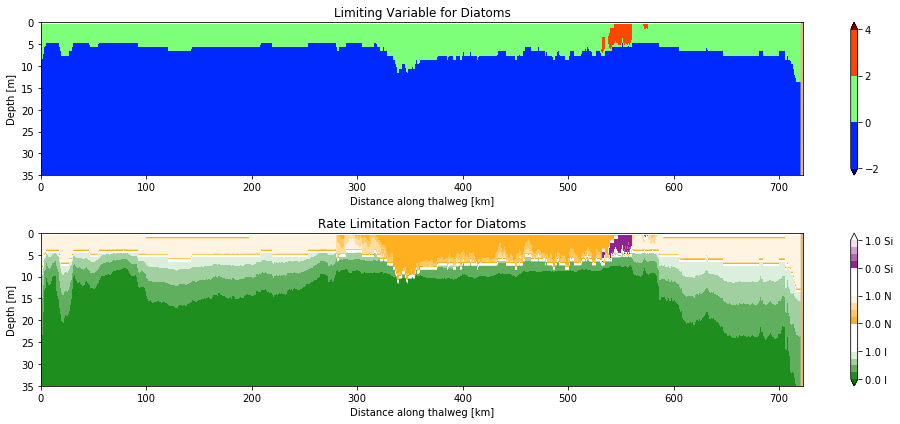

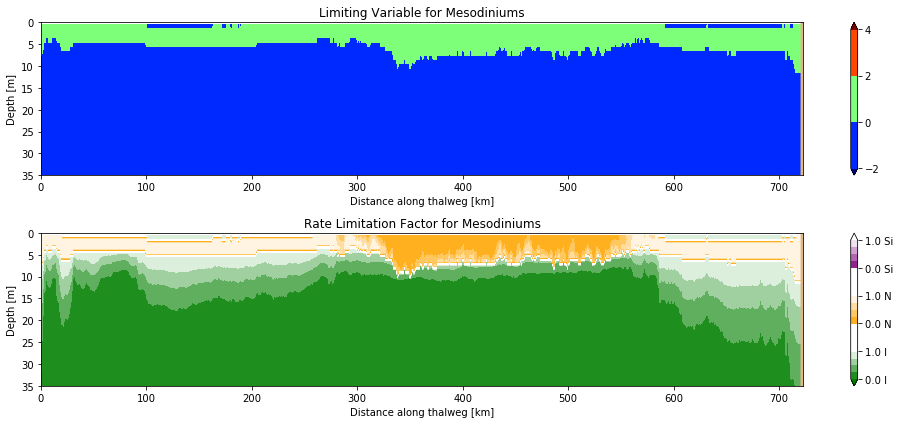

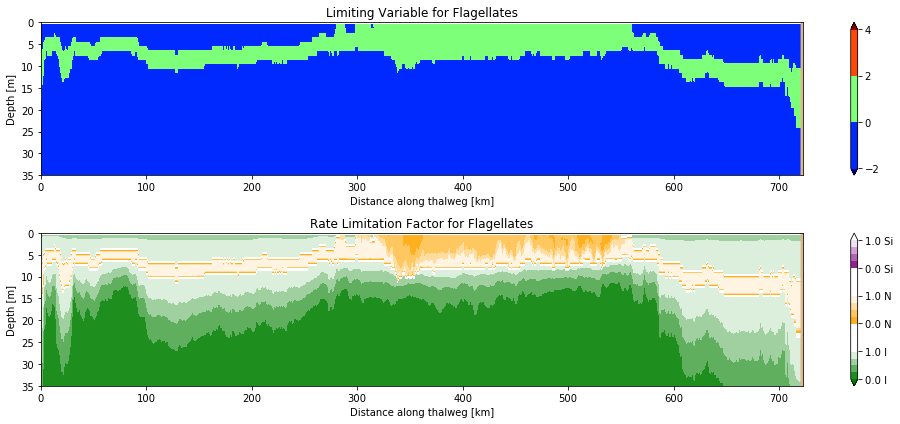

In [26]:
limit_along_thalweg('/results/SalishSea/nowcast-green/01apr16',
                   'SalishSea_2h_20160401_20160410_dia1_T.nc',
                   'SalishSea_1h_20160401_20160401_ptrc_T.nc', 'dia')
limit_along_thalweg('/results/SalishSea/nowcast-green/01apr16',
                   'SalishSea_2h_20160401_20160410_dia1_T.nc',
                   'SalishSea_1h_20160401_20160401_ptrc_T.nc', 'meso')
limit_along_thalweg('/results/SalishSea/nowcast-green/01apr16',
                   'SalishSea_2h_20160401_20160410_dia1_T.nc',
                   'SalishSea_1h_20160401_20160401_ptrc_T.nc', 'flag')

# May 2016

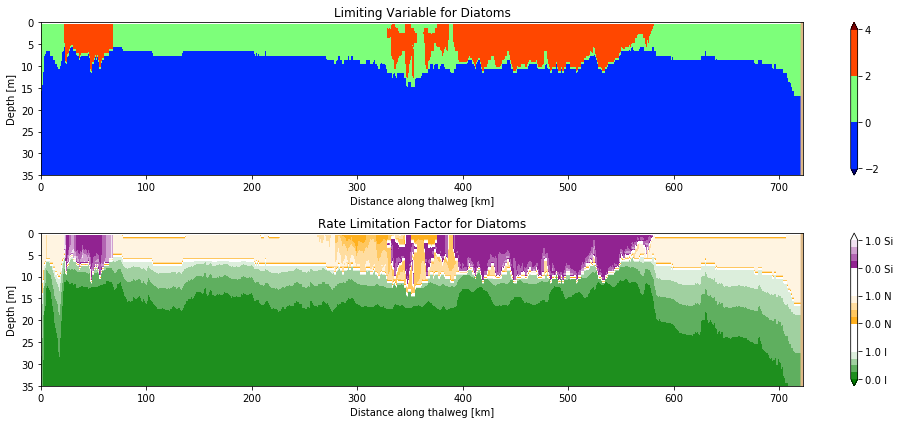

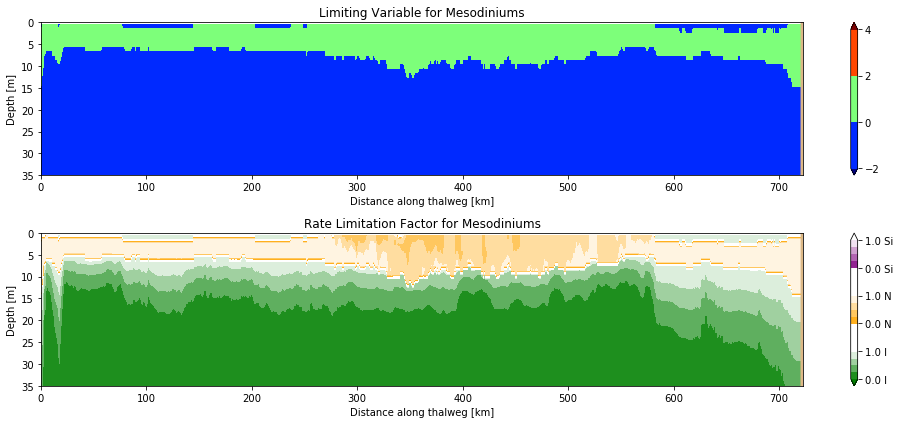

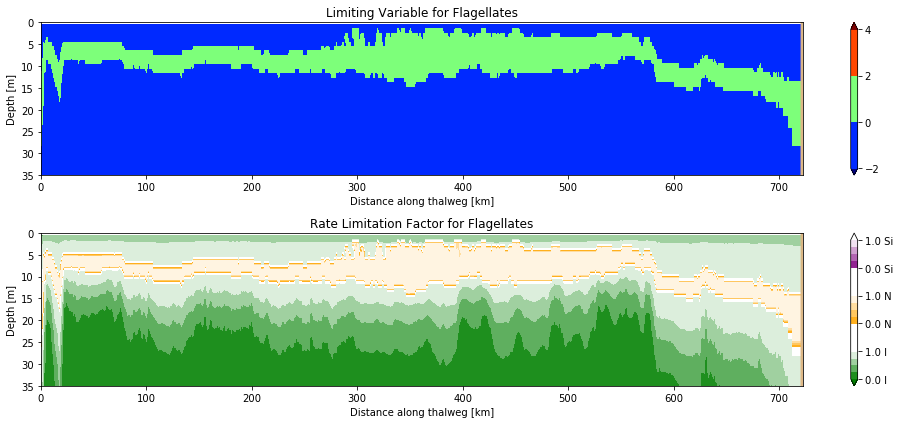

In [27]:
limit_along_thalweg('/results/SalishSea/nowcast-green/01may16',
                   'SalishSea_2h_20160501_20160510_dia1_T.nc',
                   'SalishSea_1h_20160501_20160501_ptrc_T.nc', 'dia')
limit_along_thalweg('/results/SalishSea/nowcast-green/01may16',
                   'SalishSea_2h_20160501_20160510_dia1_T.nc',
                   'SalishSea_1h_20160501_20160501_ptrc_T.nc', 'meso')
limit_along_thalweg('/results/SalishSea/nowcast-green/01may16',
                   'SalishSea_2h_20160501_20160510_dia1_T.nc',
                   'SalishSea_1h_20160501_20160501_ptrc_T.nc', 'flag')

# June 2016

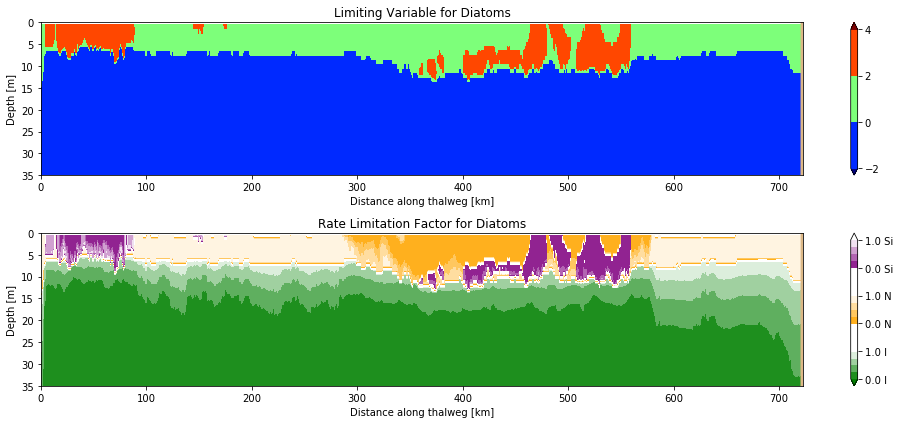

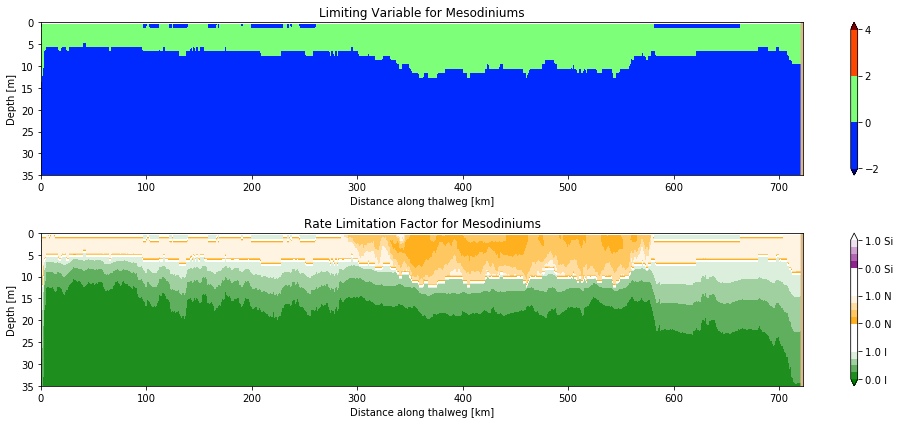

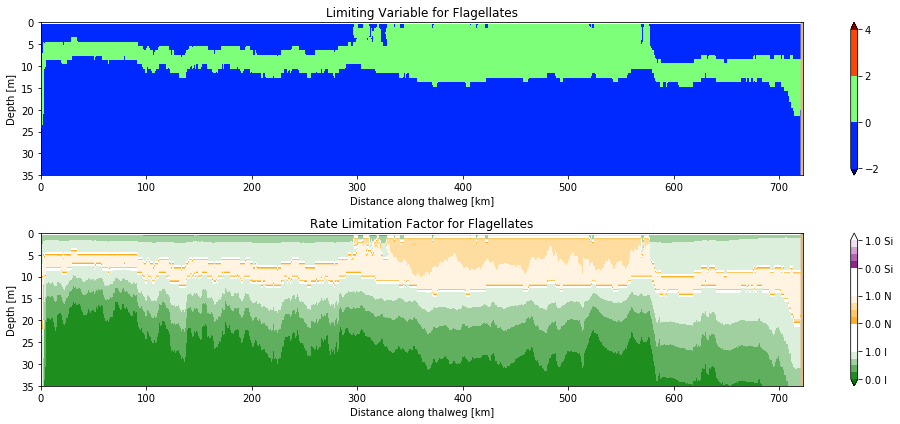

In [28]:
limit_along_thalweg('/results/SalishSea/nowcast-green/31may16',
                   'SalishSea_2h_20160531_20160609_dia1_T.nc',
                   'SalishSea_1h_20160531_20160531_ptrc_T.nc', 'dia')
limit_along_thalweg('/results/SalishSea/nowcast-green/31may16',
                   'SalishSea_2h_20160531_20160609_dia1_T.nc',
                   'SalishSea_1h_20160531_20160531_ptrc_T.nc', 'meso')
limit_along_thalweg('/results/SalishSea/nowcast-green/31may16',
                   'SalishSea_2h_20160531_20160609_dia1_T.nc',
                   'SalishSea_1h_20160531_20160531_ptrc_T.nc', 'flag')

# July 2016

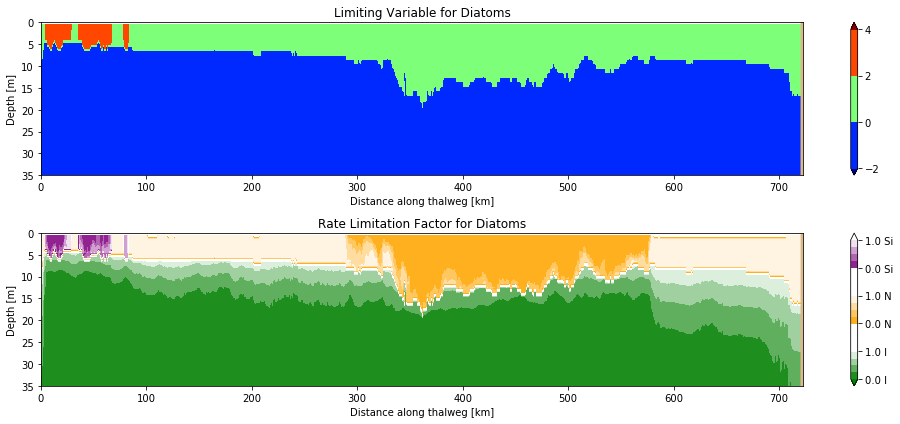

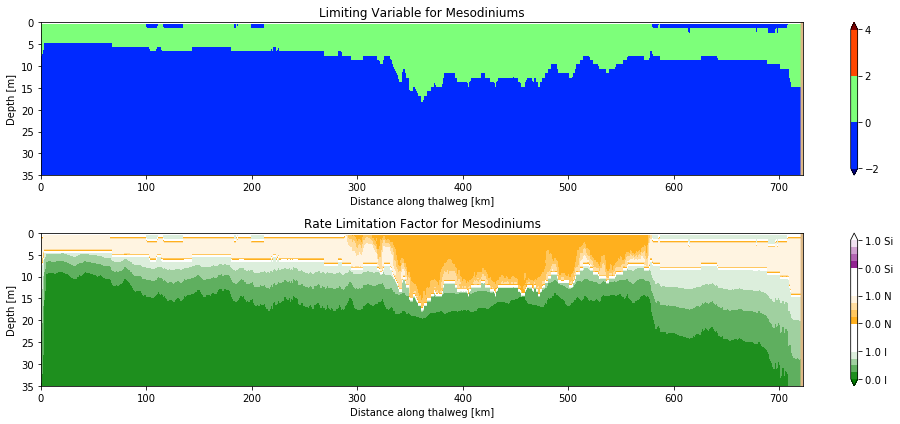

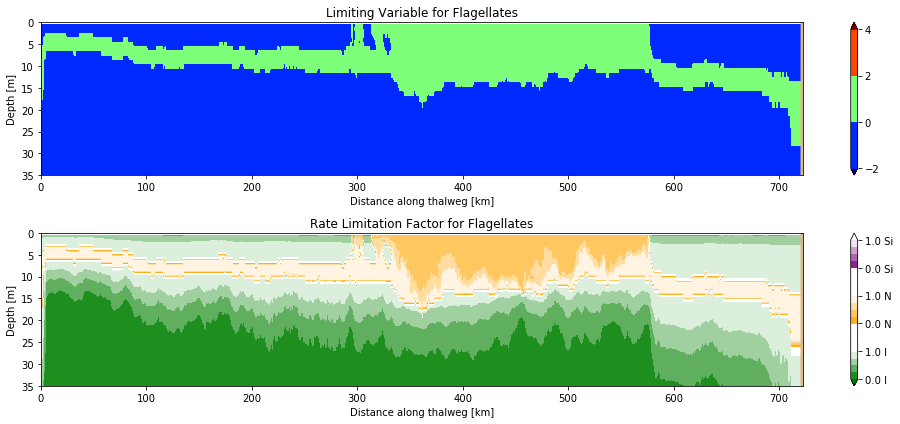

In [29]:
limit_along_thalweg('/results/SalishSea/nowcast-green/30jun16',
                   'SalishSea_2h_20160630_20160709_dia1_T.nc',
                   'SalishSea_1h_20160630_20160630_ptrc_T.nc', 'dia')
limit_along_thalweg('/results/SalishSea/nowcast-green/30jun16',
                   'SalishSea_2h_20160630_20160709_dia1_T.nc',
                   'SalishSea_1h_20160630_20160630_ptrc_T.nc', 'meso')
limit_along_thalweg('/results/SalishSea/nowcast-green/30jun16',
                   'SalishSea_2h_20160630_20160709_dia1_T.nc',
                   'SalishSea_1h_20160630_20160630_ptrc_T.nc', 'flag')

# August 2016

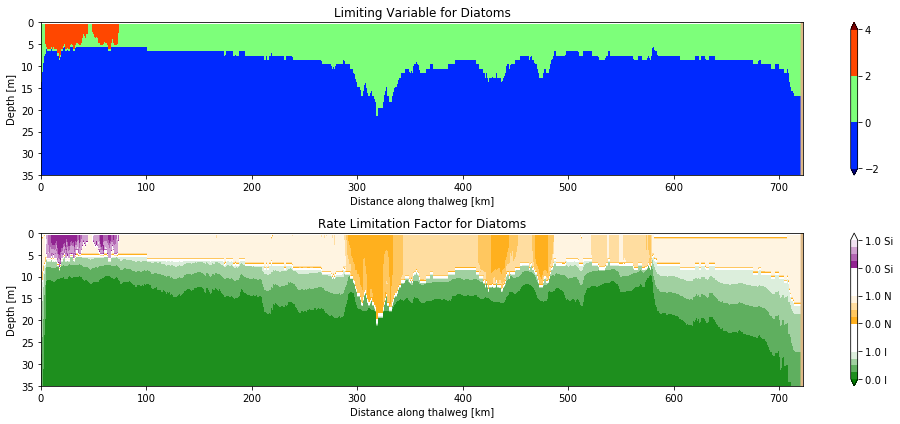

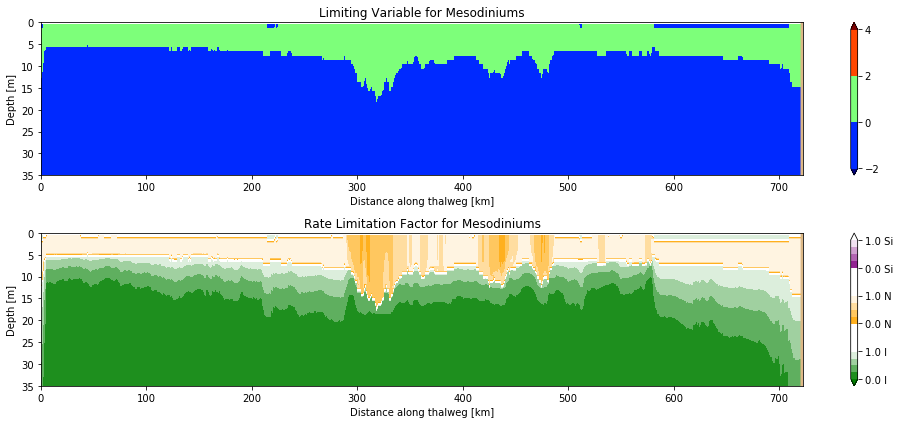

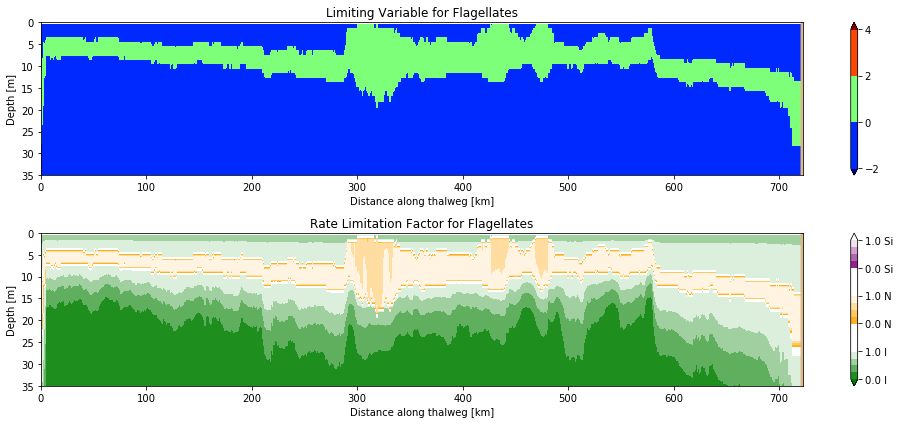

In [30]:
limit_along_thalweg('/results/SalishSea/nowcast-green/30jul16',
                   'SalishSea_2h_20160730_20160808_dia1_T.nc',
                   'SalishSea_1h_20160730_20160730_ptrc_T.nc', 'dia')
limit_along_thalweg('/results/SalishSea/nowcast-green/30jul16',
                   'SalishSea_2h_20160730_20160808_dia1_T.nc',
                   'SalishSea_1h_20160730_20160730_ptrc_T.nc', 'meso')
limit_along_thalweg('/results/SalishSea/nowcast-green/30jul16',
                   'SalishSea_2h_20160730_20160808_dia1_T.nc',
                   'SalishSea_1h_20160730_20160730_ptrc_T.nc', 'flag')

# September 2016

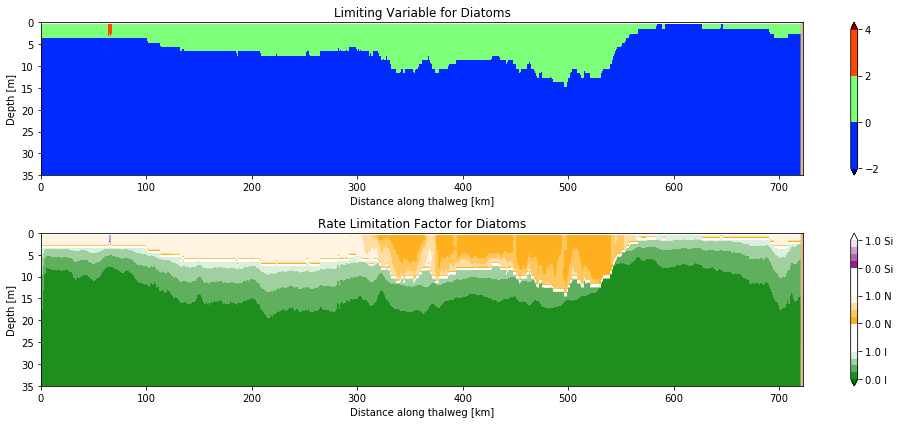

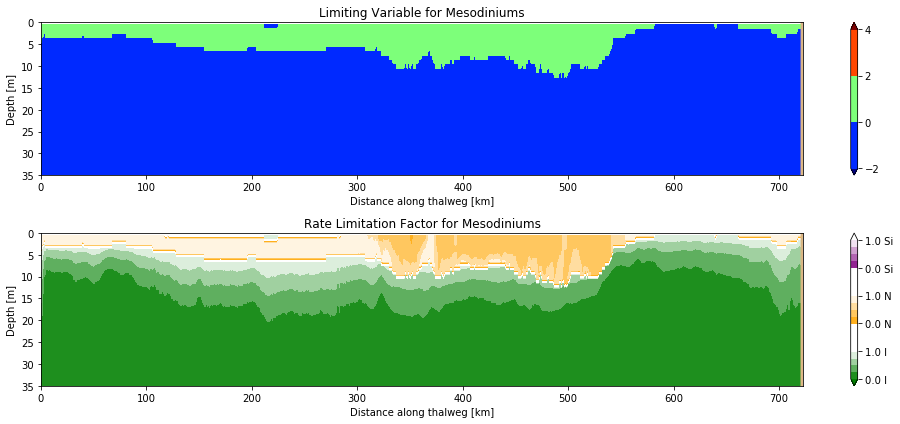

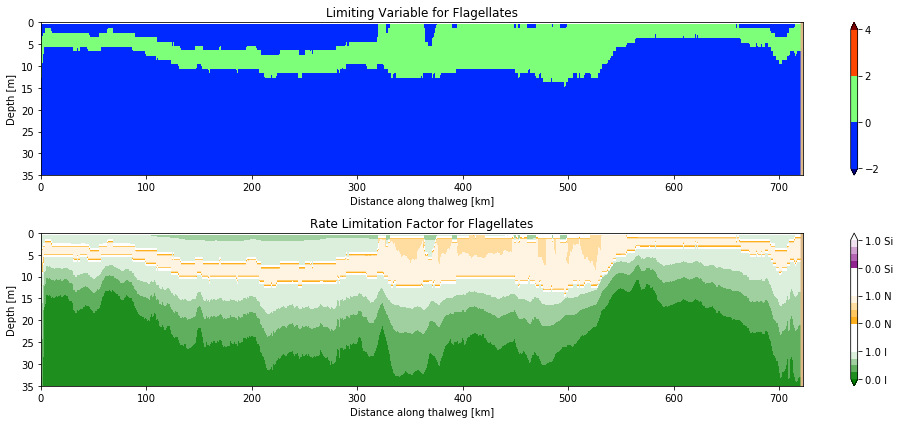

In [31]:
limit_along_thalweg('/results/SalishSea/nowcast-green/29aug16',
                   'SalishSea_2h_20160829_20160907_dia1_T.nc',
                   'SalishSea_1h_20160829_20160829_ptrc_T.nc', 'dia')
limit_along_thalweg('/results/SalishSea/nowcast-green/29aug16',
                   'SalishSea_2h_20160829_20160907_dia1_T.nc',
                   'SalishSea_1h_20160829_20160829_ptrc_T.nc', 'meso')
limit_along_thalweg('/results/SalishSea/nowcast-green/29aug16',
                   'SalishSea_2h_20160829_20160907_dia1_T.nc',
                   'SalishSea_1h_20160829_20160829_ptrc_T.nc', 'flag')

# October 2016

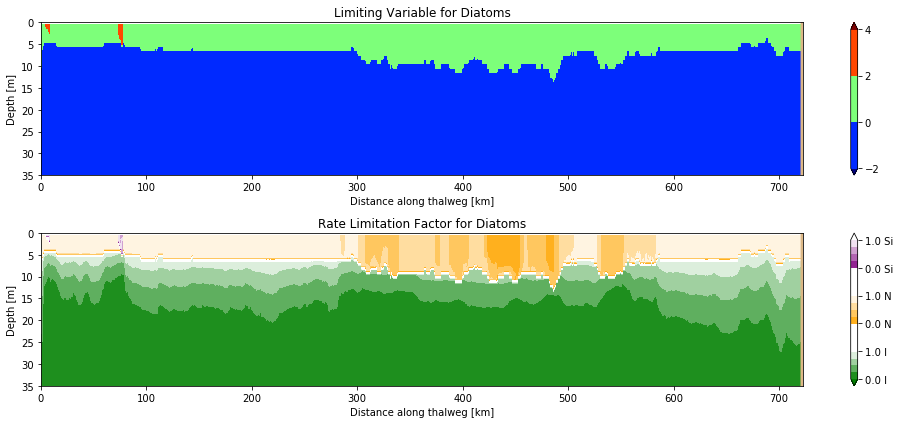

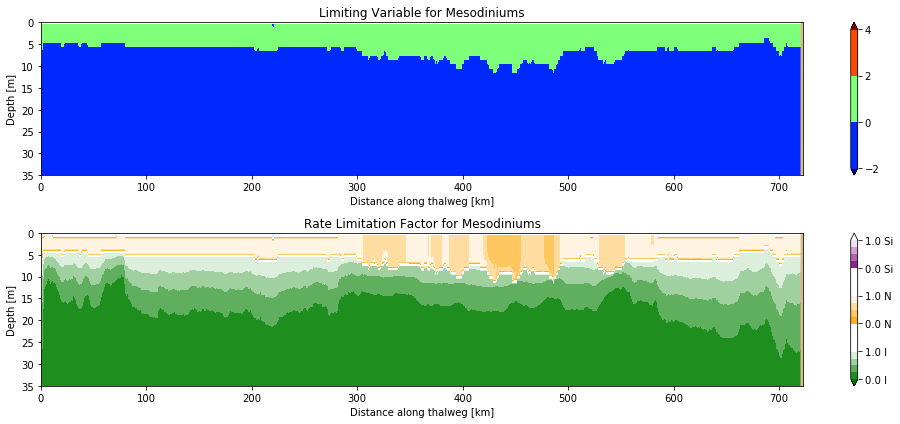

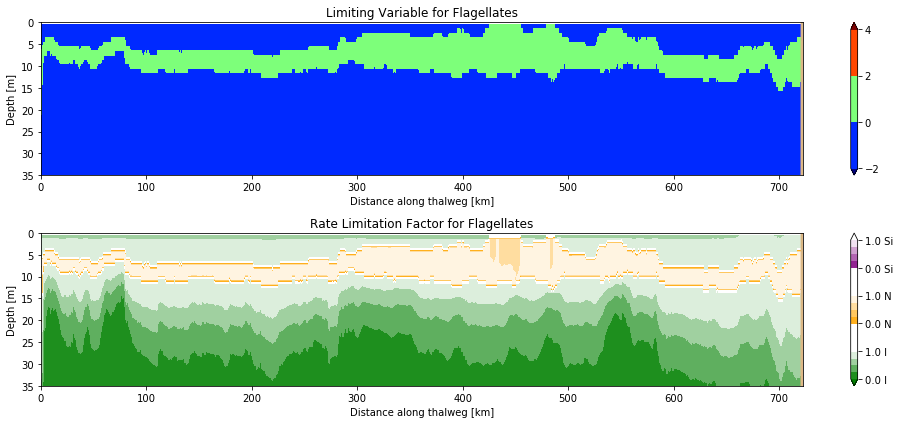

In [32]:
limit_along_thalweg('/results/SalishSea/nowcast-green/28sep16',
                   'SalishSea_2h_20160928_20161007_dia1_T.nc',
                   'SalishSea_1h_20160928_20160928_ptrc_T.nc', 'dia')
limit_along_thalweg('/results/SalishSea/nowcast-green/28sep16',
                   'SalishSea_2h_20160928_20161007_dia1_T.nc',
                   'SalishSea_1h_20160928_20160928_ptrc_T.nc', 'meso')
limit_along_thalweg('/results/SalishSea/nowcast-green/28sep16',
                   'SalishSea_2h_20160928_20161007_dia1_T.nc',
                   'SalishSea_1h_20160928_20160928_ptrc_T.nc', 'flag')

# November 2016

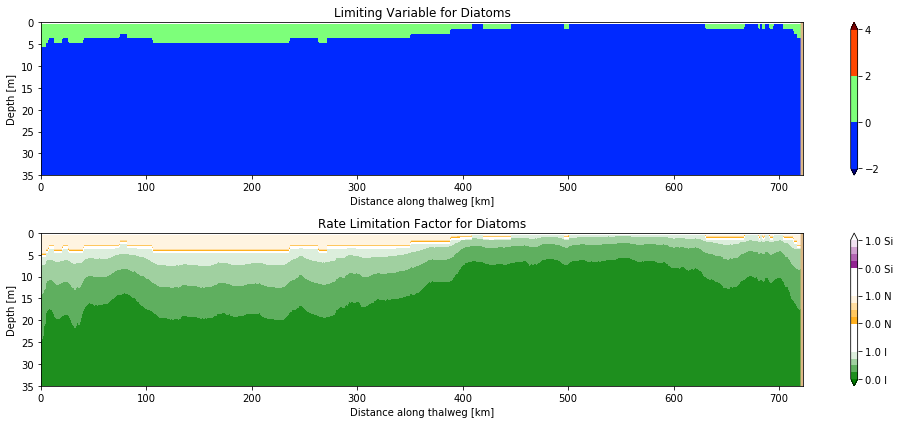

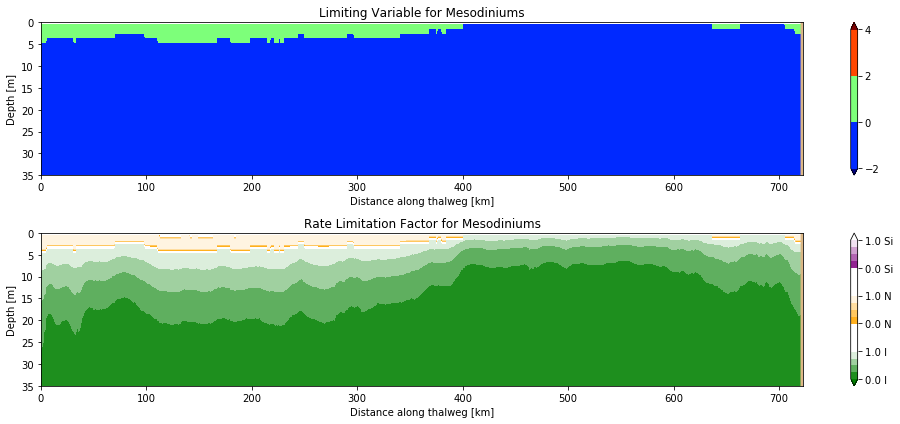

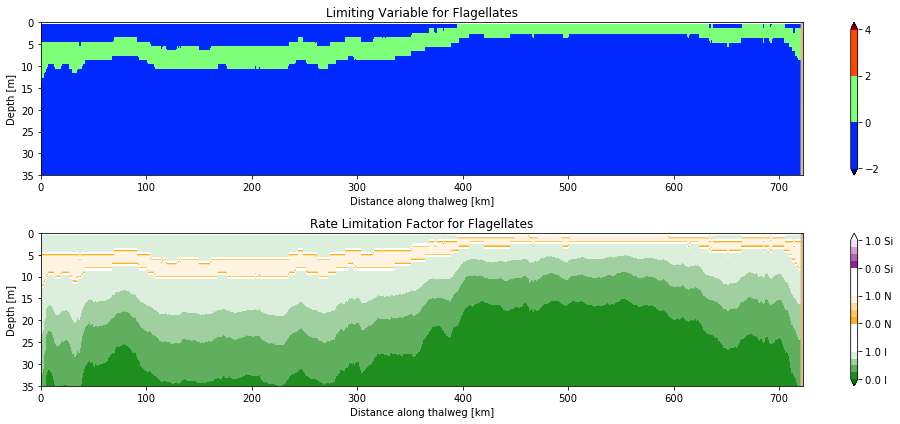

In [33]:
limit_along_thalweg('/results/SalishSea/nowcast-green/28oct16',
                   'SalishSea_2h_20161028_20161106_dia1_T.nc',
                   'SalishSea_1h_20161028_20161028_ptrc_T.nc', 'dia')
limit_along_thalweg('/results/SalishSea/nowcast-green/28oct16',
                   'SalishSea_2h_20161028_20161106_dia1_T.nc',
                   'SalishSea_1h_20161028_20161028_ptrc_T.nc', 'meso')
limit_along_thalweg('/results/SalishSea/nowcast-green/28oct16',
                   'SalishSea_2h_20161028_20161106_dia1_T.nc',
                   'SalishSea_1h_20161028_20161028_ptrc_T.nc', 'flag')

# December 2016

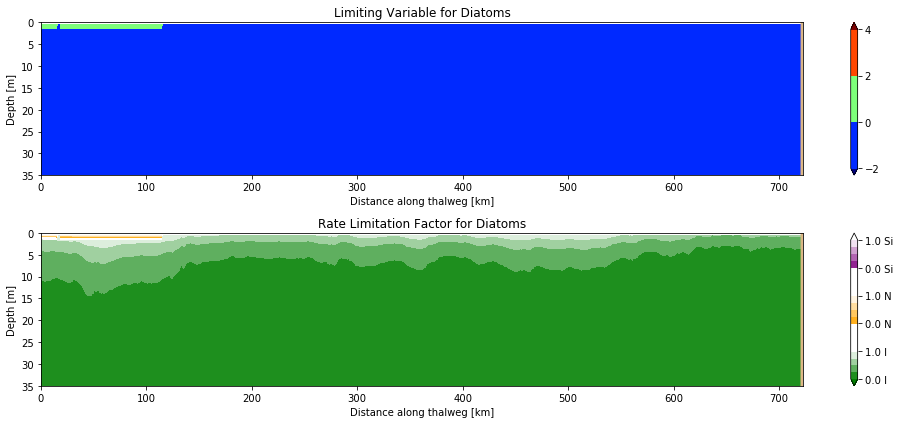

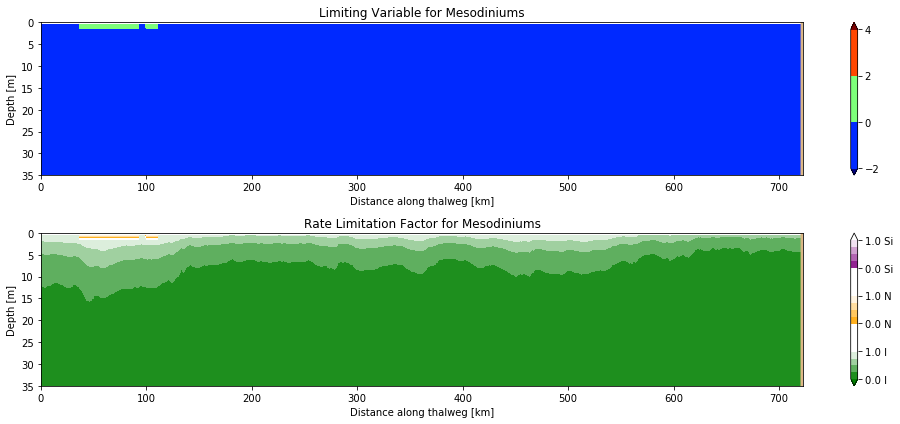

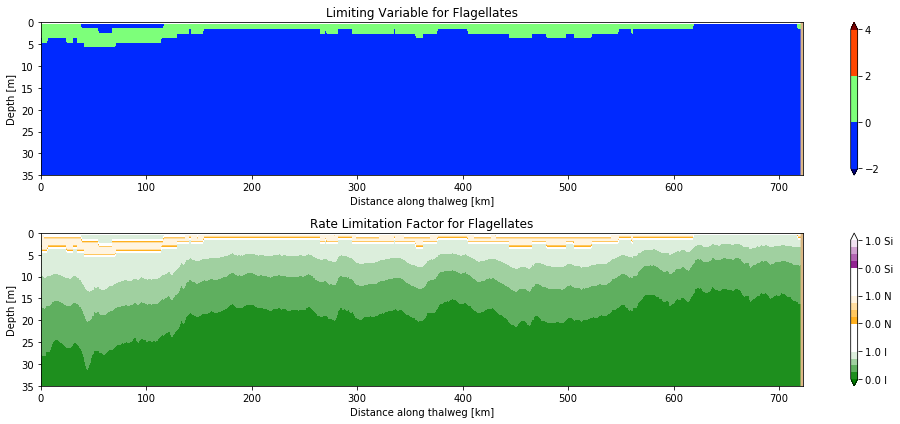

In [34]:
limit_along_thalweg('/results/SalishSea/nowcast-green/27nov16',
                   'SalishSea_2h_20161127_20161206_dia1_T.nc',
                   'SalishSea_1h_20161127_20161127_ptrc_T.nc', 'dia')
limit_along_thalweg('/results/SalishSea/nowcast-green/27nov16',
                   'SalishSea_2h_20161127_20161206_dia1_T.nc',
                   'SalishSea_1h_20161127_20161127_ptrc_T.nc', 'meso')
limit_along_thalweg('/results/SalishSea/nowcast-green/27nov16',
                   'SalishSea_2h_20161127_20161206_dia1_T.nc',
                   'SalishSea_1h_20161127_20161127_ptrc_T.nc', 'flag')